Here's a brief overview of what each library offers:

plotly.express (px):

This is a high-level interface to create various types of plots quickly and easily. It simplifies the process of creating basic visualizations such as scatter plots, bar plots, line plots, box plots, histograms, and more.
It automatically handles many aspects of plot creation, including the data transformation, plot configuration, and axis labels.
This module is ideal for interactive exploratory data analysis (EDA) and quick visualizations.
plotly.graph_objects (go):

This library provides a low-level interface that allows you to have more control over your plots.
It is based on creating figures using graph objects like traces (scatter, bar, etc.) and layout objects.
You have fine-grained control over individual plot components, making it suitable for customizing every aspect of your plot.
This module is ideal when you need complete control over the plot layout and want to create complex visualizations.


In [447]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

In [448]:
df = pd.read_csv('/Users/adithyaram/Downloads/restaurants.csv')

In [449]:
df.head()

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000


In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6593 entries, 0 to 6592
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      6593 non-null   object 
 1   Location  6593 non-null   object 
 2   Locality  6593 non-null   object 
 3   City      6593 non-null   object 
 4   Cuisine   6593 non-null   object 
 5   Rating    6593 non-null   float64
 6   Votes     6593 non-null   int64  
 7   Cost      6593 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 412.2+ KB


In [451]:
df.describe()

,Rating,Votes,Cost
count,6593.000000,6593.000000,6593.000000
mean,4.088200,119.420143,1102.798271
std,0.670031,261.849704,716.935212
min,1.000000,1.000000,100.000000
25%,3.900000,6.000000,500.000000
50%,4.200000,31.000000,900.000000
75%,4.400000,115.000000,1500.000000
max,5.000000,5016.000000,8000.000000


In [452]:
df.shape

(6593, 8)

In [453]:
print(df.columns)

Index(['Name', 'Location', 'Locality', 'City', 'Cuisine', 'Rating', 'Votes',
       'Cost'],
      dtype='object')


In [454]:
print(df.isnull().sum()) #total null values in each column of dataset

Name        0
Location    0
Locality    0
City        0
Cuisine     0
Rating      0
Votes       0
Cost        0
dtype: int64


In [455]:
df.isnull().sum().sum() #total null values in dataset

0

In [456]:
duplicates = df.duplicated().sum()
print(duplicates)

3


In [457]:
no_duplicates = df.drop_duplicates()

In [458]:
k = df['City'].value_counts()

In [459]:
df['Locality'].value_counts().sum()

6593

In [460]:
df['State'] = df['City']
df['State'] = df['City'].replace(
{'Bangalore': 'Karnataka', 
 'Delhi':'Delhi NCR', 
 'Mumbai':'Maharashtra', 
 'Kolkata':'Bengal', 
 'Hyderabad':'Telangana', 
 'Ahmedabad':'Gujarat', 
 'Chennai':'Tamil Nadu', 
 'Pune':'Maharashtra', 
 'Jaipur':'Rajasthan', 
 'Chandigarh':'Punjab', 
 'Indore':'Madhya Pradesh', 
 'Gurgaon':'Delhi NCR', 
 'Noida':'Delhi NCR', 
 'Vadodara':'Gujarat', 
 'Lucknow':'Uttar Pradesh', 
 'Agra':'Uttar Pradesh', 
 'Nagpur':'Maharashtra', 
 'Surat':'Gujarat', 
 'Ludhiana':'Punjab', 
 'Goa':'Goa', 
 'Ghaziabad':'Delhi NCR', 
 'Udaipur':'Rajasthan', 
 'Kochi':'Kerala'}
)

In [461]:
df['State'].value_counts()

Maharashtra       1144
Delhi NCR         1114
Karnataka         1019
Bengal             712
Telangana          589
Gujarat            569
Tamil Nadu         388
Punjab             326
Rajasthan          311
Madhya Pradesh     204
Uttar Pradesh      155
Goa                 60
Kerala               2
Name: State, dtype: int64

In [462]:
df['Rating'].value_counts()

4.3    811
4.2    699
4.4    681
4.5    576
4.1    575
4.0    555
5.0    476
3.9    334
4.6    281
3.8    245
3.7    179
3.6    144
3.5    133
4.7    131
3.0    123
1.0    118
3.4     82
3.3     77
4.8     72
3.1     44
3.2     39
2.8     30
2.9     26
2.5     22
2.7     20
4.9     19
2.0     18
2.3     13
2.6     13
2.1     12
2.2      8
1.7      7
2.4      7
1.9      5
1.8      4
1.3      4
1.6      4
1.4      3
1.5      3
Name: Rating, dtype: int64

In [463]:
df['City'].value_counts()

Bangalore     1019
Delhi          734
Mumbai         727
Kolkata        712
Hyderabad      589
Ahmedabad      414
Chennai        388
Pune           351
Jaipur         268
Chandigarh     264
Indore         204
Gurgaon        184
Noida          146
Vadodara        91
Lucknow         80
Agra            75
Nagpur          66
Surat           64
Ludhiana        62
Goa             60
Ghaziabad       50
Udaipur         43
Kochi            2
Name: City, dtype: int64

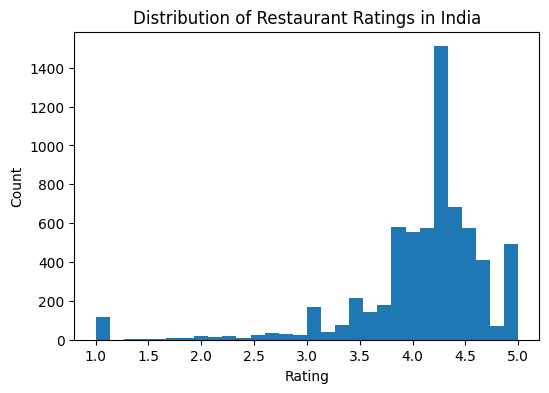

In [464]:
plt.figure(figsize=(6,4))
plt.hist(df['Rating'], bins=30)

plt.title('Distribution of Restaurant Ratings in India')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

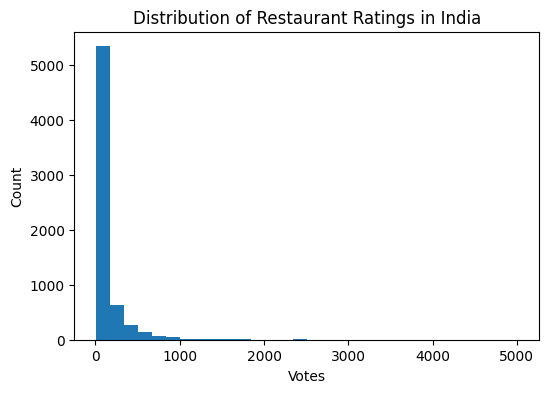

In [465]:
plt.figure(figsize=(6,4))
plt.hist(df['Votes'], bins=30)

plt.title('Distribution of Restaurant Ratings in India')
plt.xlabel('Votes')
plt.ylabel('Count')
plt.show()

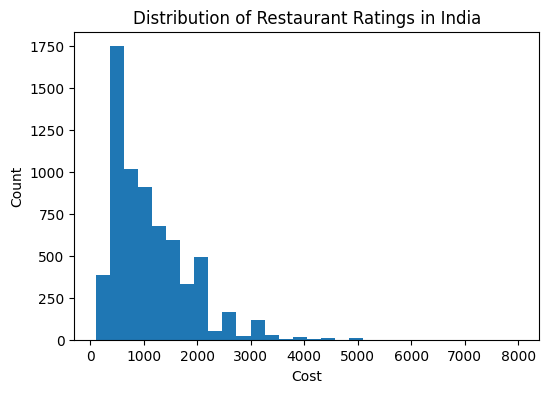

In [466]:
plt.figure(figsize=(6,4))
plt.hist(df['Cost'], bins=30)

plt.title('Distribution of Restaurant Ratings in India')
plt.xlabel('Cost')
plt.ylabel('Count')
plt.show()

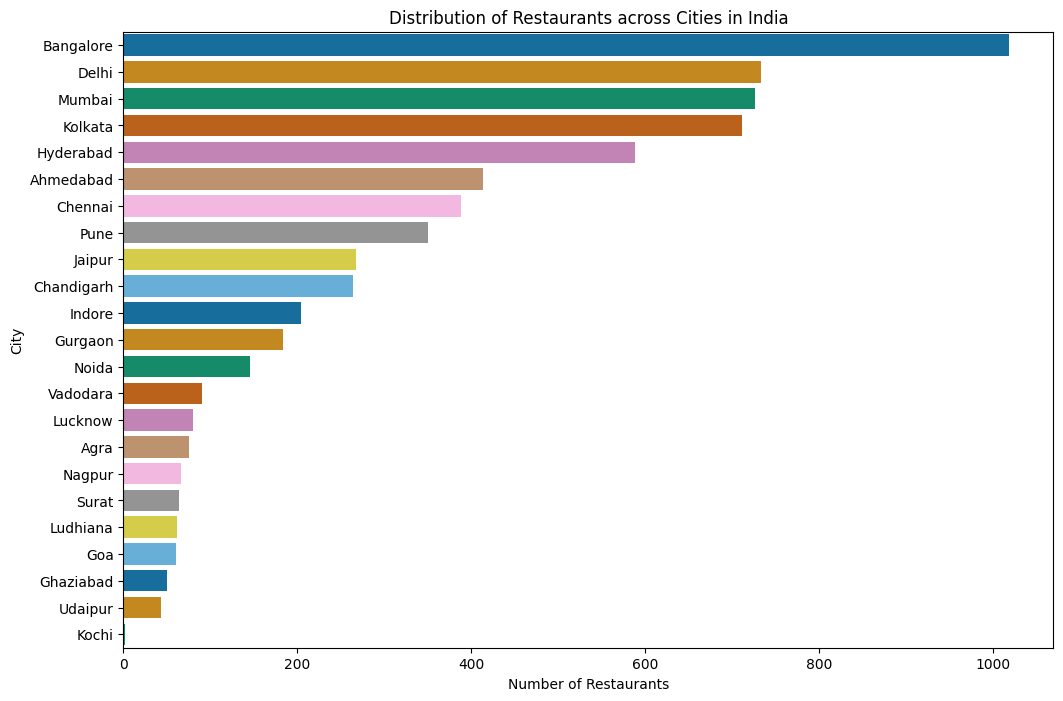

In [467]:
plt.figure(figsize=(12,8))
sns.countplot(y = 'City', data = df, order = df['City'].value_counts().index, palette = 'colorblind')

plt.title('Distribution of Restaurants across Cities in India')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

In [468]:
# Forming state-wise dataframe
df_state = df.groupby('State').mean()
df_state.reset_index(level = 0, inplace = True)

/var/folders/q6/r2pjq4vj34jg6gj5dyw7htkm0000gn/T/ipykernel_2357/588039774.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [469]:
df_state

,State,Rating,Votes,Cost
0,Bengal,3.990590,108.025281,880.897472
1,Delhi NCR,4.196589,268.772890,1516.921005
2,Goa,4.153333,27.216667,1480.000000
3,Gujarat,4.164675,43.014060,743.233743
4,Karnataka,4.029931,100.210010,924.288518
5,Kerala,3.400000,8.500000,650.000000
6,Madhya Pradesh,3.790686,55.382353,1017.892157
7,Maharashtra,4.146591,100.781469,1205.594406
8,Punjab,4.094785,47.055215,1033.742331
9,Rajasthan,4.090032,40.488746,1145.337621


### Average rating in each state from above obtained data

In [470]:
fig = px.bar(df_state, x='State', y='Rating', color='State', 
             title='Comparison of Ratings Across States',
             labels={'State':'State', 'Rating':'Average Rating'})
fig.show()

In [471]:
df_cost = df.groupby('State')['Cost'].mean().reset_index()

# sort the dataframe by cost
df_cost = df_cost.sort_values('Cost')

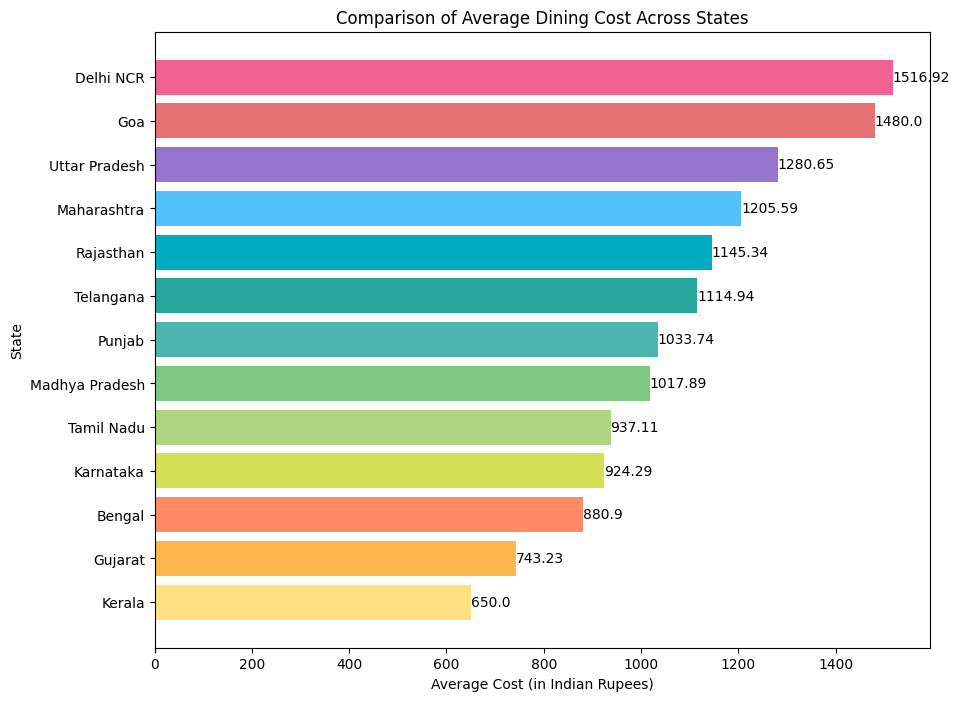

In [472]:
df_cost = df.groupby('State')['Cost'].mean().reset_index()

# sort the dataframe by cost
df_cost = df_cost.sort_values('Cost')

# set color palette
colors = ['#FFE082','#FFB74D','#FF8A65','#D4E157','#AED581','#81C784','#4DB6AC','#26A69A','#00ACC1','#4FC3F7','#9575CD','#E57373','#F06292','#BA68C8','#F48FB1','#BDBDBD','#90A4AE','#80DEEA','#FFD54F','#F44336']

# plot the data as a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(df_cost['State'], df_cost['Cost'], color=colors)
plt.title('Comparison of Average Dining Cost Across States')
plt.xlabel('Average Cost (in Indian Rupees)')
plt.ylabel('State')

# add value labels to the bars
for index, value in enumerate(df_cost['Cost']):
    plt.text(value, index, str(round(value,2)), color='black', fontsize=10, ha='left', va='center')

plt.show()


In [473]:
# create a dataframe with average cost by city
df_cost_city = df.groupby('City')['Cost'].mean().reset_index()

# sort the dataframe by cost

In [474]:
df_cost_city = df_cost_city.sort_values('Cost')

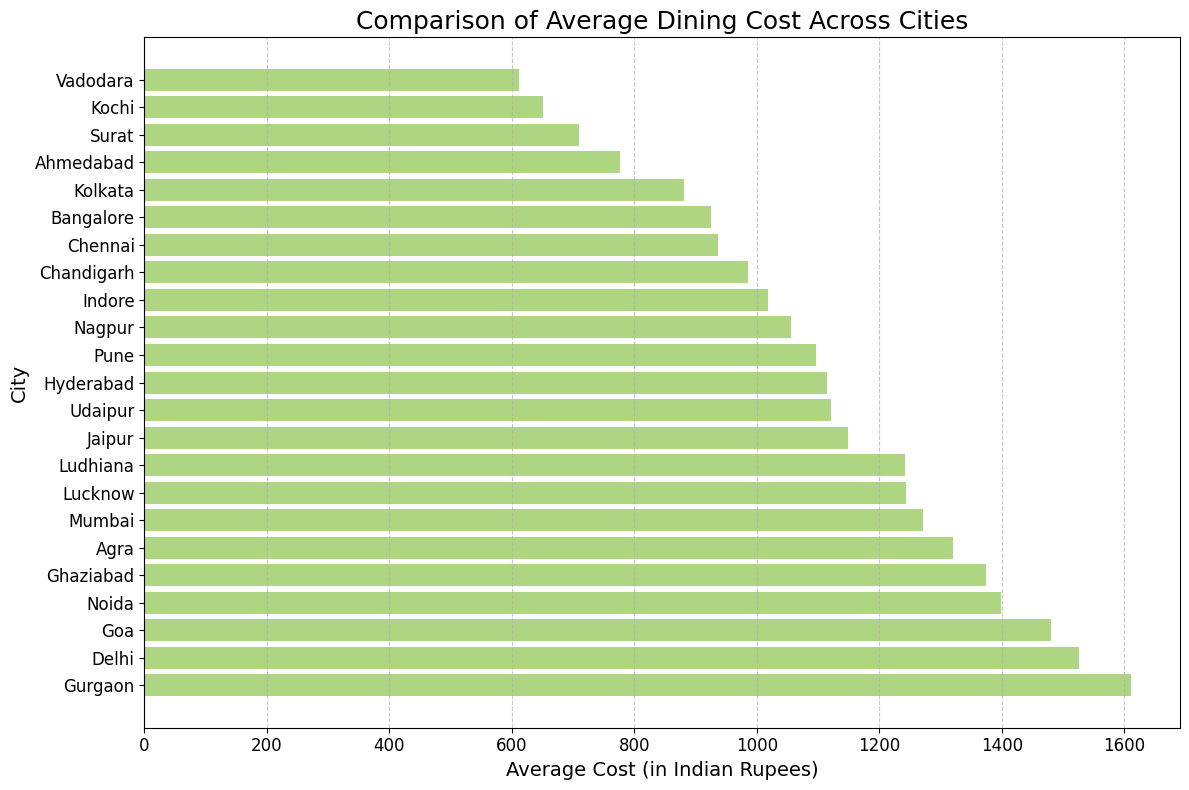

In [475]:
plt.figure(figsize=(12, 8))
plt.barh(df_cost_city['City'], df_cost_city['Cost'], color='#AED581')

plt.title('Comparison of Average Dining Cost Across Cities', fontsize=18)

plt.xlabel('Average Cost (in Indian Rupees)', fontsize=14)
plt.ylabel('City', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [476]:
df_rating = df.groupby('State')['Rating'].mean().reset_index()
len(df_rating)

13

In [477]:
df_rating

,State,Rating
0,Bengal,3.990590
1,Delhi NCR,4.196589
2,Goa,4.153333
3,Gujarat,4.164675
4,Karnataka,4.029931
5,Kerala,3.400000
6,Madhya Pradesh,3.790686
7,Maharashtra,4.146591
8,Punjab,4.094785
9,Rajasthan,4.090032


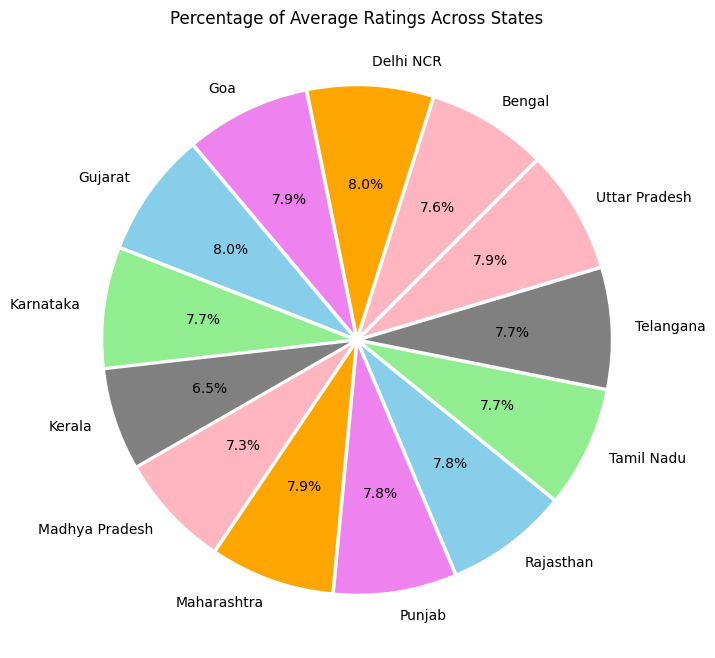

In [478]:
colors = ['lightpink', 'orange', 'violet', 'skyblue','lightgreen','gray']


plt.figure(figsize=(8,8))
plt.pie(df_rating['Rating'], labels=df_rating['State'], colors = colors, autopct='%1.1f%%', startangle=45, explode=[0.03]*len(df_rating))
plt.title('Percentage of Average Ratings Across States')
plt.show()

In [479]:
df_votes = df.groupby('State')['Votes'].mean().reset_index()

In [480]:
df_votes

,State,Votes
0,Bengal,108.025281
1,Delhi NCR,268.772890
2,Goa,27.216667
3,Gujarat,43.014060
4,Karnataka,100.210010
5,Kerala,8.500000
6,Madhya Pradesh,55.382353
7,Maharashtra,100.781469
8,Punjab,47.055215
9,Rajasthan,40.488746


In [481]:
import plotly.graph_objects as go
colors = ["skyblue", "lightcoral", "gold", "lightgreen", "purple", 
          "orange", "teal", "gray", "pink", "lime", "brown", "cyan", "red", "yellow"]

fig = go.Figure(
    data=[
        go.Pie(
            labels=df_votes['State'],
            values=df_votes['Votes'],
            textfont_size=20,
            hole = 0.35,
            insidetextorientation='radial',
        )
    ]
)

fig.show()

In [482]:
df_cuisines = df.groupby(['City','Cuisine'])['Name'].count().reset_index()

In [483]:
df_cuisines

,City,Cuisine,Name
0,Agra,Bakery and Confectionary,1
1,Agra,Chinese,1
2,Agra,"Chinese, Seafood",1
3,Agra,"Chinese, Thai",2
4,Agra,"Coffee, Tea",1
5,Agra,"Coffee, Tea, Fast Food",1
6,Agra,Fast Food,6
7,Agra,"Fast Food, Mithai, North Indian, South Indian",1
8,Agra,Finger Food,5
9,Agra,Health Food,1


In [484]:
df_top_cuisine = df_cuisines.loc[df_cuisines.groupby('City')['Name'].idxmax()]

In [485]:
df_top_cuisine

,City,Cuisine,Name
6,Agra,Fast Food,6
271,Ahmedabad,South Indian,23
545,Bangalore,"Mithai, Desserts",67
771,Chandigarh,Fast Food,16
1005,Chennai,"Multi-Cuisine, North Indian, Chinese, South...",26
1415,Delhi,"North Indian, Mughlai",33
1478,Ghaziabad,"North Indian, Chinese",7
1521,Goa,"Multi-Cuisine, North Indian, South Indian, ...",10
1682,Gurgaon,"Street Food, Tea, Fast Food",10
1912,Hyderabad,"North Indian, Chinese",39


In [486]:
fig = px.bar(df_top_cuisine, x='City', y='Name',color='Cuisine',
             labels={'City': 'City', 'Name': 'Number of Restaurants'},
             title='Top Cuisine in Each City',height=500)
fig.show()